In [14]:
#import libraries
import pandas as pd
import os
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd 
import matplotlib.pyplot as plt

#show the current working folder
print(os.getcwd())

C:\Users\hp\Desktop\Text Processing


In [4]:
# Install git if you don't have it already
# !pip install gitpython  # Uncomment if needed

# Git commands to push your notebook
import os

# These commands will be executed in the directory where your notebook is located
# Replace with your information
github_username = "your-username"
repository_name = "your-repository"
notebook_filename = "your-notebook.ipynb"  # Change to your notebook filename
commit_message = "Add Jupyter notebook"

# Git commands
commands = [
    "git init",
    f"git add {notebook_filename}",
    f'git commit -m "{commit_message}"',
    f"git remote add origin https://github.com/{github_username}/{repository_name}.git",
    "git push -u origin master"  # Use 'main' instead of 'master' for newer repositories
]

# Execute the commands
for cmd in commands:
    print(f"Executing: {cmd}")
    os.system(cmd)

Executing: git init
Executing: git add your-notebook.ipynb
Executing: git commit -m "Add Jupyter notebook"
Executing: git remote add origin https://github.com/your-username/your-repository.git
Executing: git push -u origin master


In [9]:
# Install git if you don't have it already
# !pip install gitpython  # Uncomment if needed

import os

# These commands will be executed in the directory you want to push
# Replace with your information
github_username = "your-username"
repository_name = "your-repository"
commit_message = "Initial commit of entire project folder"

# Change to the directory you want to push (if needed)
# os.chdir('/path/to/your/folder')  # Uncomment and modify if your notebook isn't in the folder you want to push

# Git commands
commands = [
    "git init",
    "git add .",  # This adds all files in the folder
    f'git commit -m "{commit_message}"',
    f"git remote add origin https://github.com/{github_username}/{repository_name}.git",
    "git push -u origin master"  # Use 'main' instead of 'master' for newer repositories
]

# Execute the commands
for cmd in commands:
    print(f"Executing: {cmd}")
    os.system(cmd)

Executing: git init
Executing: git add .
Executing: git commit -m "Initial commit of entire project folder"
Executing: git remote add origin https://github.com/your-username/your-repository.git
Executing: git push -u origin master


In [7]:
with open("text_1.txt", "r") as f:
    data = f.read()

print(data)

Machine Learning: A Comprehensive Overview
What is Machine Learning?
Machine learning (ML) is a subset of artificial intelligence (AI) that enables systems to learn from data, identify patterns, and make decisions with minimal human intervention. ML algorithms aim to improve performance over time with more data exposure.

Core Components of Machine Learning
Decision Process: The algorithm uses input data (labeled or unlabeled) to make predictions or classifications.

Error Function: Evaluates the modelâ€™s prediction accuracy by comparing it to known outcomes.

Model Optimization: Adjusts weights through iterative evaluation to improve accuracy.

ML, Deep Learning, and Neural Networks
While often used interchangeably, these are distinct concepts:

Machine Learning includes various learning techniques, relying on human-defined features.

Deep Learning (a subfield of ML) uses multi-layered neural networks and can work with raw, unstructured data, minimizing the need for manual feature en

In [11]:
# Normalization  

def normalize(input_data):
    normalized_lines = []
    for line in input_data.splitlines():
        cleaned_line = " ".join(line.lower().strip().split())
        if cleaned_line:
            normalized_lines.append(cleaned_line)
    return "\n".join(normalized_lines)


In [13]:
normalized_text = normalize(data)
print(normalized_text)

machine learning: a comprehensive overview
what is machine learning?
machine learning (ml) is a subset of artificial intelligence (ai) that enables systems to learn from data, identify patterns, and make decisions with minimal human intervention. ml algorithms aim to improve performance over time with more data exposure.
core components of machine learning
decision process: the algorithm uses input data (labeled or unlabeled) to make predictions or classifications.
error function: evaluates the modelâ€™s prediction accuracy by comparing it to known outcomes.
model optimization: adjusts weights through iterative evaluation to improve accuracy.
ml, deep learning, and neural networks
while often used interchangeably, these are distinct concepts:
machine learning includes various learning techniques, relying on human-defined features.
deep learning (a subfield of ml) uses multi-layered neural networks and can work with raw, unstructured data, minimizing the need for manual feature engineer

In [15]:
#Expanding contractions
def contractions_remove(text):
    contractions = {
        r"won\'t": "will not",
        r"can\'t": "cannot",
        r"n\'t": " not",  
        r"\'re": " are",
        r"\'s": " is", 
        r"\'d": " would",
        r"\'ll": " will",
        r"\'ve": " have",
        r"\'m": " am"
    }

    for contraction, expansion in contractions.items():
        text = re.sub(contraction, expansion, text)  

    return text

In [17]:
def text_tokenizer(input_data):
    input_data = contractions_remove(input_data)
    input_data = re.sub(r'\d+', '', input_data)   # to remove numbers
    return re.findall(r'\b\w+\b',input_data)   #to find all words


In [19]:
tokenized_text = text_tokenizer(normalized_text)
print(tokenized_text)

['machine', 'learning', 'a', 'comprehensive', 'overview', 'what', 'is', 'machine', 'learning', 'machine', 'learning', 'ml', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence', 'ai', 'that', 'enables', 'systems', 'to', 'learn', 'from', 'data', 'identify', 'patterns', 'and', 'make', 'decisions', 'with', 'minimal', 'human', 'intervention', 'ml', 'algorithms', 'aim', 'to', 'improve', 'performance', 'over', 'time', 'with', 'more', 'data', 'exposure', 'core', 'components', 'of', 'machine', 'learning', 'decision', 'process', 'the', 'algorithm', 'uses', 'input', 'data', 'labeled', 'or', 'unlabeled', 'to', 'make', 'predictions', 'or', 'classifications', 'error', 'function', 'evaluates', 'the', 'modelâ', 's', 'prediction', 'accuracy', 'by', 'comparing', 'it', 'to', 'known', 'outcomes', 'model', 'optimization', 'adjusts', 'weights', 'through', 'iterative', 'evaluation', 'to', 'improve', 'accuracy', 'ml', 'deep', 'learning', 'and', 'neural', 'networks', 'while', 'often', 'used', 'interchangea

In [21]:
# Parts of speech tagging
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

In [23]:
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    tagged = pos_tag(words) 
    return [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in tagged
    ]

In [25]:
stemmed_text = lemmatize_words(tokenized_text)
print(stemmed_text)

['machine', 'learn', 'a', 'comprehensive', 'overview', 'what', 'be', 'machine', 'learn', 'machine', 'learn', 'ml', 'be', 'a', 'subset', 'of', 'artificial', 'intelligence', 'ai', 'that', 'enable', 'system', 'to', 'learn', 'from', 'data', 'identify', 'pattern', 'and', 'make', 'decision', 'with', 'minimal', 'human', 'intervention', 'ml', 'algorithms', 'aim', 'to', 'improve', 'performance', 'over', 'time', 'with', 'more', 'data', 'exposure', 'core', 'component', 'of', 'machine', 'learn', 'decision', 'process', 'the', 'algorithm', 'use', 'input', 'data', 'label', 'or', 'unlabeled', 'to', 'make', 'prediction', 'or', 'classification', 'error', 'function', 'evaluate', 'the', 'modelâ', 's', 'prediction', 'accuracy', 'by', 'compare', 'it', 'to', 'know', 'outcome', 'model', 'optimization', 'adjusts', 'weight', 'through', 'iterative', 'evaluation', 'to', 'improve', 'accuracy', 'ml', 'deep', 'learning', 'and', 'neural', 'network', 'while', 'often', 'use', 'interchangeably', 'these', 'be', 'distinct

In [27]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(input_words):
    result = [word for word in input_words if word not in stop_words]
    return result

In [29]:
stop_word_removed_text = remove_stop_words(stemmed_text)
print(stop_word_removed_text) 

['machine', 'learn', 'comprehensive', 'overview', 'machine', 'learn', 'machine', 'learn', 'ml', 'subset', 'artificial', 'intelligence', 'ai', 'enable', 'system', 'learn', 'data', 'identify', 'pattern', 'make', 'decision', 'minimal', 'human', 'intervention', 'ml', 'algorithms', 'aim', 'improve', 'performance', 'time', 'data', 'exposure', 'core', 'component', 'machine', 'learn', 'decision', 'process', 'algorithm', 'use', 'input', 'data', 'label', 'unlabeled', 'make', 'prediction', 'classification', 'error', 'function', 'evaluate', 'modelâ', 'prediction', 'accuracy', 'compare', 'know', 'outcome', 'model', 'optimization', 'adjusts', 'weight', 'iterative', 'evaluation', 'improve', 'accuracy', 'ml', 'deep', 'learning', 'neural', 'network', 'often', 'use', 'interchangeably', 'distinct', 'concept', 'machine', 'learn', 'include', 'various', 'learn', 'technique', 'rely', 'human', 'define', 'feature', 'deep', 'learn', 'subfield', 'ml', 'us', 'multi', 'layered', 'neural', 'network', 'work', 'raw',

In [31]:
def calculate_frequency(data):
    word_freq = Counter(data)
    sorted_word_frequency = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_frequency



In [35]:
word_frequency = calculate_frequency(stop_word_removed_text)
print(word_frequency)

[('learn', 8), ('machine', 5), ('ml', 4), ('data', 4), ('network', 4), ('human', 3), ('use', 3), ('deep', 3), ('neural', 3), ('make', 2), ('decision', 2), ('improve', 2), ('prediction', 2), ('accuracy', 2), ('feature', 2), ('layer', 2), ('comprehensive', 1), ('overview', 1), ('subset', 1), ('artificial', 1), ('intelligence', 1), ('ai', 1), ('enable', 1), ('system', 1), ('identify', 1), ('pattern', 1), ('minimal', 1), ('intervention', 1), ('algorithms', 1), ('aim', 1), ('performance', 1), ('time', 1), ('exposure', 1), ('core', 1), ('component', 1), ('process', 1), ('algorithm', 1), ('input', 1), ('label', 1), ('unlabeled', 1), ('classification', 1), ('error', 1), ('function', 1), ('evaluate', 1), ('modelâ', 1), ('compare', 1), ('know', 1), ('outcome', 1), ('model', 1), ('optimization', 1), ('adjusts', 1), ('weight', 1), ('iterative', 1), ('evaluation', 1), ('learning', 1), ('often', 1), ('interchangeably', 1), ('distinct', 1), ('concept', 1), ('include', 1), ('various', 1), ('technique'

In [37]:
df = pd.DataFrame(word_frequency, columns=['Word', 'Frequency'])
df['Rank'] = df.index + 1  # Rank starts from 1
df['Rank × Frequency'] = df['Rank'] * df['Frequency']

In [39]:
output_file = "word_frequency.xlsx"
df.to_excel(output_file, index=False, sheet_name="Word Frequency")
print(f"Excel file saved as: {output_file}")

Excel file saved as: word_frequency.xlsx


In [20]:
df = pd.read_excel("word_frequency.xlsx")


print(df)

         Word  Frequency  Rank  Rank × Frequency
0       learn          8     1                 8
1     machine          5     2                10
2          ml          4     3                12
3        data          4     4                16
4     network          4     5                20
..        ...        ...   ...               ...
75   simulate          1    76                76
76      brain          1    77                77
77       node          1    78                78
78      three          1    79                79
79  qualifies          1    80                80

[80 rows x 4 columns]


In [ ]:
def plot_frequency_vs_rank_graph(sorted_word_freq):
    frequencies = [freq for _, freq in sorted_word_freq]
    ranks = range(1, len(frequencies) + 1)

    plt.figure(figsize=(10,6))

    
    plt.plot(ranks, frequencies, label='Word Frequency vs Word Rank')
    plt.title('Word Frequency vs Word Rank')
    plt.xlabel('Word Rank')
    plt.ylabel('Word Frequency')
    
    plt.grid(True)

    # Customize x and y limits 
    plt.xlim(0,len(frequencies) )
    plt.ylim(0, max(frequencies) + 10)
    

    # cutoff lines
    plt.axvline(x=25, color='r', linestyle='--', label='Upper Cutoff')
    plt.axvline(x=100, color='g', linestyle='--', label='Lower Cutoff')

   
    plt.legend()

    plt.show()



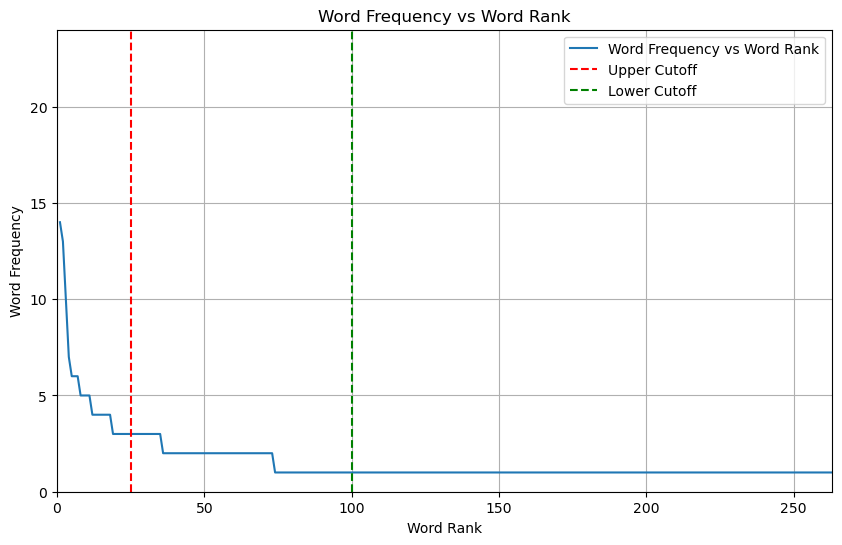

In [91]:
plot_frequency_vs_rank_graph(word_frequency) 